In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


# Import Data
We have three datas: small, middle and big
Ee use the small one for exploration and find the features that we want use them
We use the middle one for first coding, test and updating the procces
And at the end we will use the big data for clustering

Small Data

In [49]:
df_audio_small = pd.read_csv('df_audio_features_10')
df_audio_small.columns = df_audio_small.columns.str.strip()
df_audio_small = df_audio_small.drop_duplicates(subset=['song_name', 'artist'])
df_audio_small

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


Middle Data

In [40]:
df_audio_middle = pd.read_csv('df_audio_features_1000')
df_audio_middle.columns = df_audio_middle.columns.str.strip()
df_audio_middle = df_audio_middle.drop_duplicates(subset=['name', 'artist'])
df_audio_middle

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.6240,0.46800,10,-12.162,1,0.1320,0.881,0.000006,0.1440,0.9520,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.5850,0.24700,1,-12.612,1,0.0400,0.452,0.000009,0.1070,0.5910,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.2900,0.22700,3,-13.060,1,0.0311,0.944,0.000079,0.6170,0.2240,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
3,"What'd I Say, Pt. 1 & 2",Ray Charles,0.5400,0.68100,4,-5.440,1,0.0508,0.808,0.000000,0.1620,0.7940,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
4,Dream A Little Dream Of Me,Ella Fitzgerald,0.4550,0.16700,0,-13.613,1,0.0739,0.918,0.000000,0.1730,0.4040,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,NaN,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
1436,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,NaN,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
1437,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,NaN,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
1438,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,NaN,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


Big Data

In [8]:
df_audio_features = pd.read_csv('df_audio_features_5000')
df_audio_features.columns = df_audio_features.columns.str.strip()
df_audio_features = df_audio_features.drop_duplicates(subset=['name', 'artist'])

In [9]:
df_audio_features.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5114 entries, 0 to 5234
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5114 non-null   object 
 1   artist            5114 non-null   object 
 2   danceability      5114 non-null   float64
 3   energy            5114 non-null   float64
 4   key               5114 non-null   int64  
 5   loudness          5114 non-null   float64
 6   mode              5114 non-null   int64  
 7   speechiness       5114 non-null   float64
 8   acousticness      5114 non-null   float64
 9   instrumentalness  5114 non-null   float64
 10  liveness          5114 non-null   float64
 11  valence           5114 non-null   float64
 12  tempo             5114 non-null   float64
 13  type              5114 non-null   object 
 14  duration_ms       5114 non-null   int64  
 15  time_signature    5114 non-null   int64  
 16  id                5114 non-null   object 


# Exploration
we use the small data for exploration and make some desissions for the which features we wamt to use for this clustering and which one is more important 

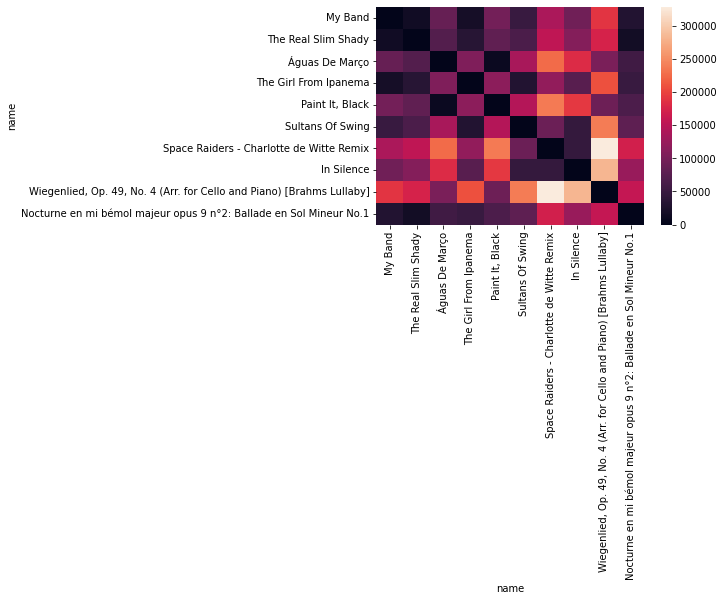

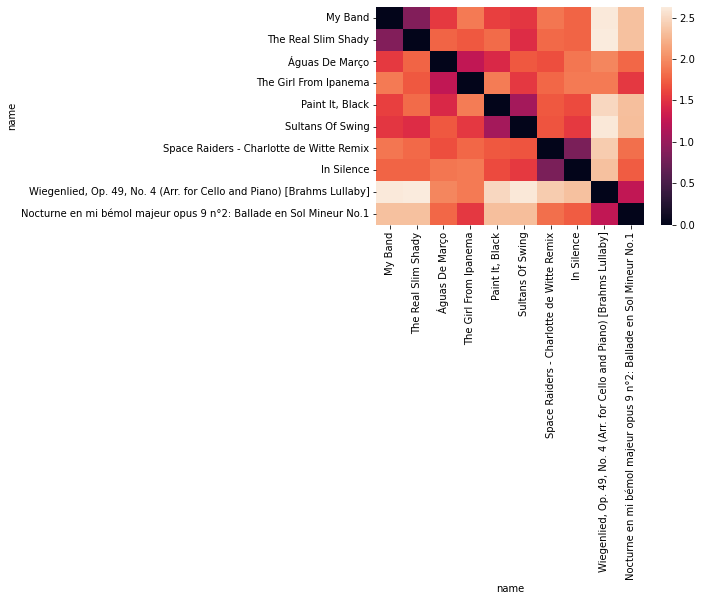

In [26]:
# choose columns that we dont need them in the model
drop_columns=['artist','id','html']
rename_columns = {'song_name':'name'}
# rename song_name to name and set name as index to dataframe
df_au_small_numerics = df_audio_small.rename(columns= rename_columns).set_index('name')
# drop the wxtra columns
df_au_small_numerics.drop(columns = drop_columns, inplace= True)

# initialize MinMaxScaler to scale data 
min_max_scaler = preprocessing.MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(df_au_small_numerics)
scaled_small_df = min_max_scaler.transform(df_au_small_numerics)

scaled_small_df = pd.DataFrame(scaled_small_df,
                                index= df_au_small_numerics.index,
                                columns= df_au_small_numerics.columns)

# compute pairwise distances between songs for original and scaled data frame
euclidian_distances_original = pd.DataFrame(pairwise_distances(df_au_small_numerics), index= df_au_small_numerics.index, columns= df_au_small_numerics.index)
euclidian_distances_scaled = pd.DataFrame(pairwise_distances(scaled_small_df), index= df_au_small_numerics.index, columns= df_au_small_numerics.index)
# visualize pairwise distances

sns.heatmap(euclidian_distances_original)
plt.show()
sns.heatmap(euclidian_distances_scaled)
plt.show()

**Multy_scaler Function:**

i deccided to use a mix of scalers depend on the value's ranges of each feature, then i made this function that help me to apply different scalers for each column.
and after exploring the dat i found out some of feature have more effect for clustering, i tried to give them a gain to make them bolder in clustering

In [27]:
#just for making our list of scaler i save the scalers in small names variables
max_s = preprocessing.MaxAbsScaler
min_max_s = preprocessing.MinMaxScaler
standard_s = preprocessing.StandardScaler
robust_s = preprocessing.RobustScaler

#this function get a data frame and a list of (scalers names, weight) for each column
#and it return a scaled data frame with the input list 
def multy_sk_scaler(df,fn_list):
    index=0
    scaled_df = pd.DataFrame()#create aan empty dataframe
    for col_name in df.columns: # for each columns
        #save the scaler function in scaler_fn and fit it just by the column that we want to apply 
        scaler_fn = fn_list[index][0]()
        scaler_fn.fit(df[[col_name,col_name]])
        #aplly the scaler and add the result in a column with same name 
        scaled_df[col_name]=(scaler_fn.transform(df[[col_name,col_name]])[:,0]) *fn_list[index][1] # multiply by the weight for column 
        index+=1
    return scaled_df  

**Tuning the scaler_list:**

After i listen to the songs i made 5 clusters, {(1,2), (3,4), (5,6), (7,8), (9.10)}
And then i try to find out which features are mor effective in this dessision, and i made alot of change to decrease the distance between members of this clusters 

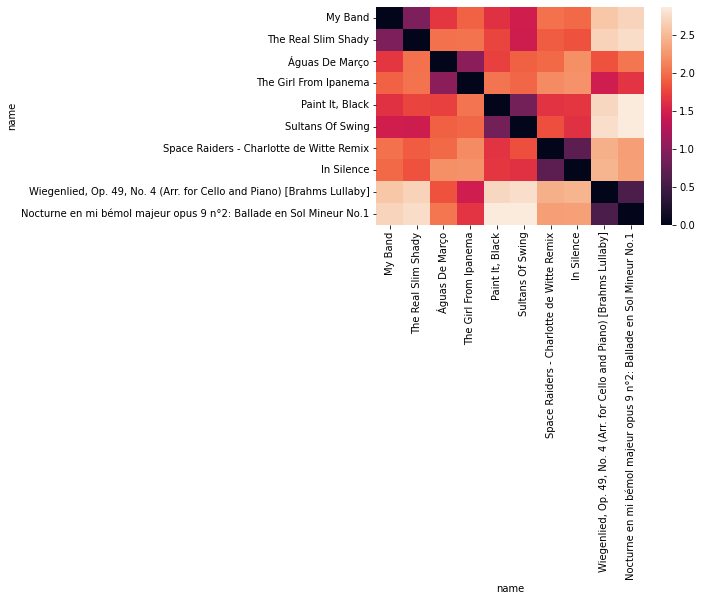

In [38]:
#create a list of scale_types and weight for each column
scaler_list_small = [(max_s,1.4), (max_s,1.5),(max_s,0.5),(min_max_s,0), (max_s,1), (max_s,1.2), (max_s,1.5), (max_s,1.2), (max_s,1), (max_s,1.2), (min_max_s,1.3), (max_s,0), (max_s,0)]
#apply the multy_scaler_fn to normilize the dataframe
multy_scaled_small_df = multy_sk_scaler(df_au_small_numerics, scaler_list_small)

# compute pairwise distances between songs for original and scaled data frame
euclidian_distances_multiscaled = pd.DataFrame(pairwise_distances(multy_scaled_small_df), index= df_au_small_numerics.index, columns= df_au_small_numerics.index)
# visualize pairwise distances

sns.heatmap(euclidian_distances_multiscaled)
plt.show()

**Compare different scaler**

we use the middle data for this step, we can use big data too. but middle one is easier to explore

In [41]:
# choose columns that we dont need them in the model
drop_columns=['artist', 'type', 'id','html']
# set name as index to dataframe
df_au_numerics_middle = df_audio_middle.set_index('name')
# drop the wxtra columns
df_au_numerics_middle.drop(columns = drop_columns, inplace= True)

In [46]:
#Standard scaling
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(df_au_numerics_middle)
norm_Standard_middle = standard_scaler.transform(df_au_numerics_middle)

df_norm_Standard_middle = pd.DataFrame(norm_Standard_middle,
                                index= df_au_numerics_middle.index,
                                columns= df_au_numerics_middle.columns)

#Robust scaling
robust_scaler = preprocessing.RobustScaler()
robust_scaler.fit(df_au_numerics_middle)
norm_Robust_middle = robust_scaler.transform(df_au_numerics_middle)

df_norm_Robust_middle = pd.DataFrame(norm_Robust_middle,
                                index= df_au_numerics_middle.index,
                                columns= df_au_numerics_middle.columns)

#Range scaling
def range_scaling(col): 
    min_col = 0
    max_col = 10
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

df_norm_Range_middle = df_au_numerics_middle.apply(range_scaling, axis=0).copy()

#Min max scaling
min_max_scaler = preprocessing.MinMaxScaler(feature_range= (0, 1))
min_max_scaler.fit(df_au_numerics_middle)
norm_MinMax_middle = min_max_scaler.transform(df_au_numerics_middle)

df_norm_MinMax_middle = pd.DataFrame(norm_MinMax_middle,
                                index= df_au_numerics_middle.index,
                                columns= df_au_numerics_middle.columns)

#Quantile Transforming
quantile_transformer = preprocessing.QuantileTransformer()
quantile_transformer.fit(df_au_numerics_middle)
norm_Quantile_middle = quantile_transformer.transform(df_au_numerics_middle)

df_norm_Quantile_middle = pd.DataFrame(norm_Quantile_middle,
                                index= df_au_numerics_middle.index,
                                columns= df_au_numerics_middle.columns)

#MultyScaler
scaler_list_small = [(max_s,1.4), (max_s,1.5),(max_s,0.5),(min_max_s,0), (max_s,1), (max_s,1.2), (max_s,1.5), (max_s,1.2), (max_s,1), (max_s,1.2), (min_max_s,1.3), (max_s,0), (max_s,0)]
df_MultyScaler_middle = multy_sk_scaler(df_au_numerics_middle, scaler_list_small)

Visualize different scalers:

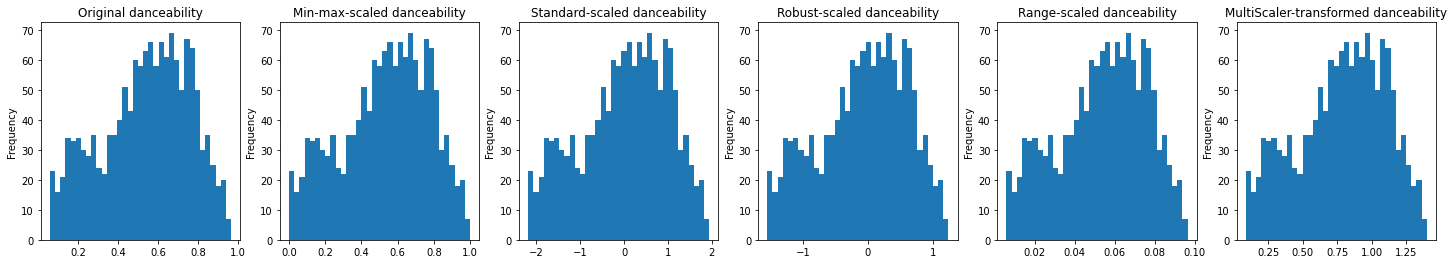

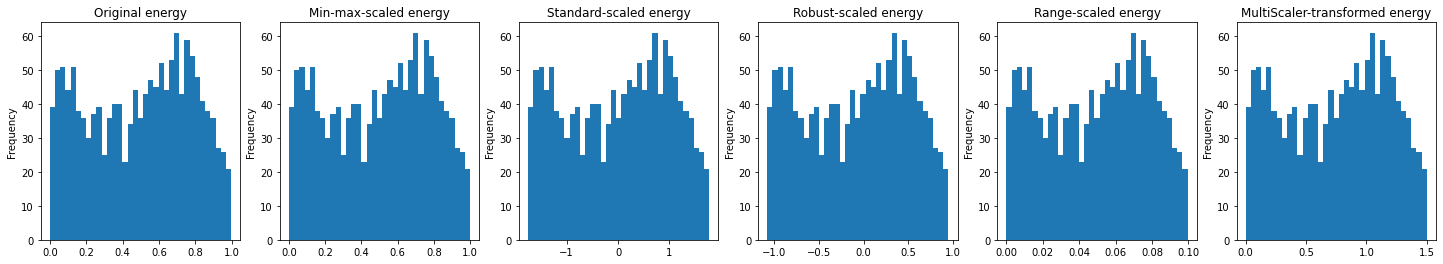

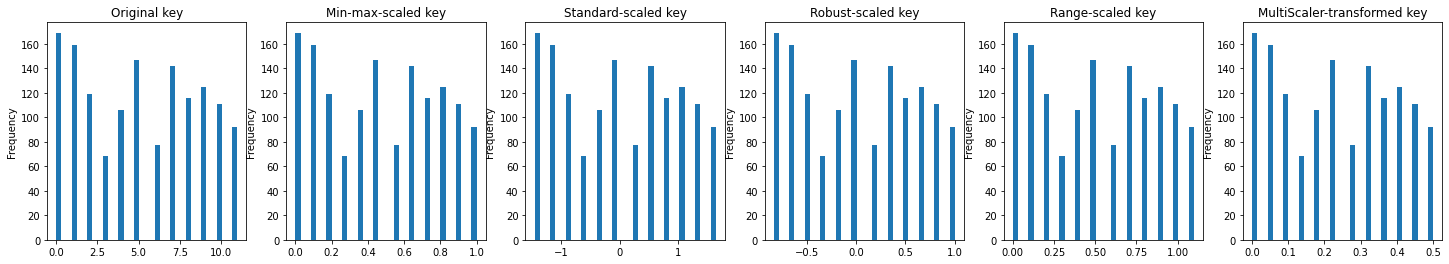

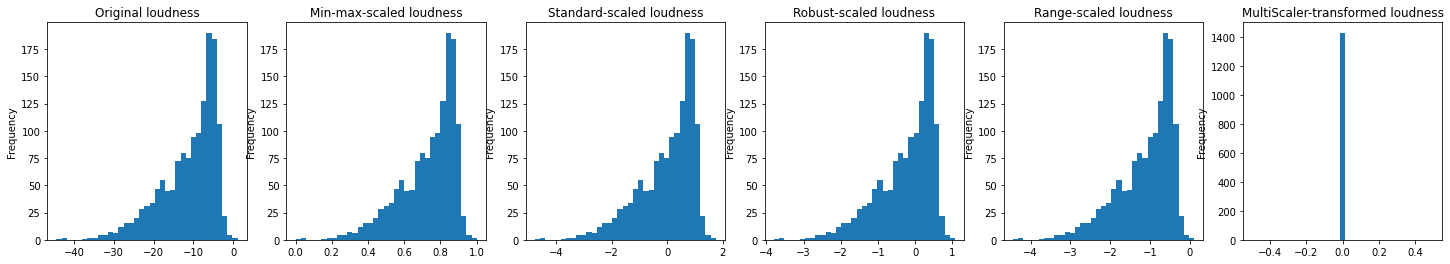

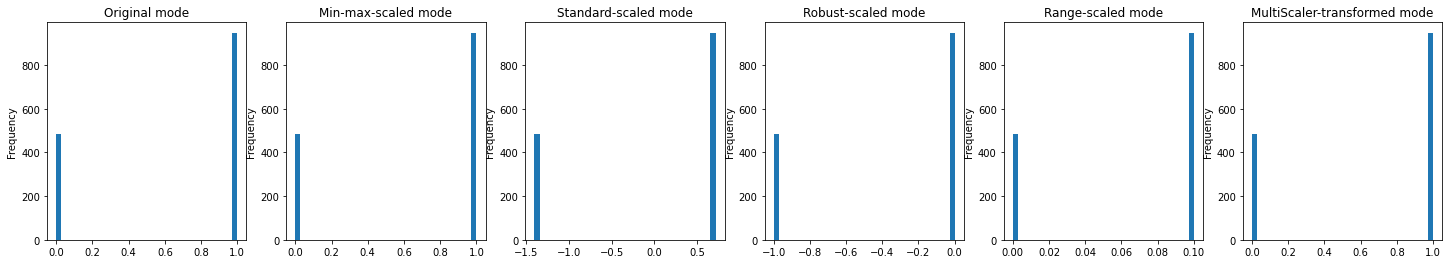

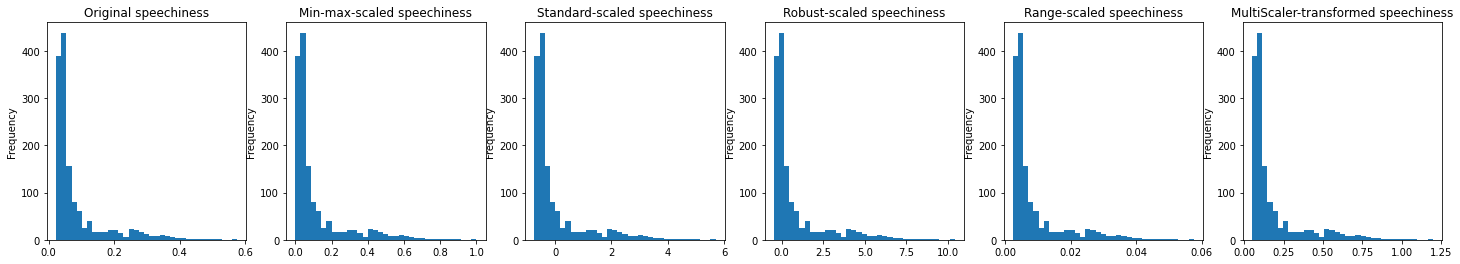

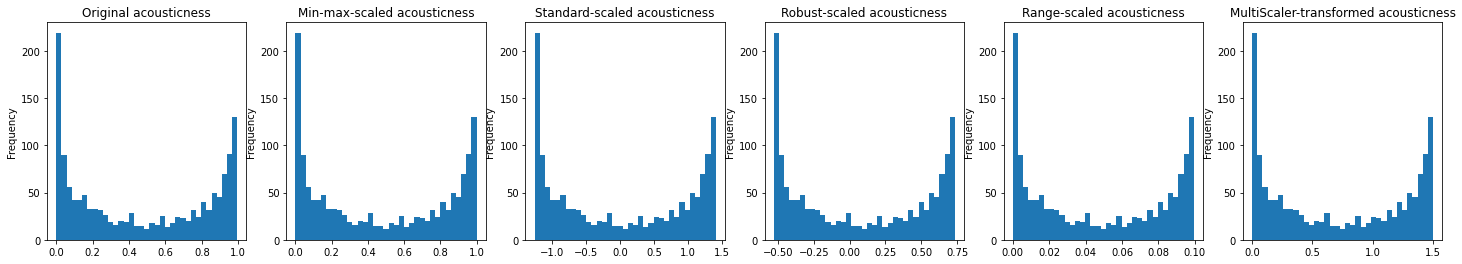

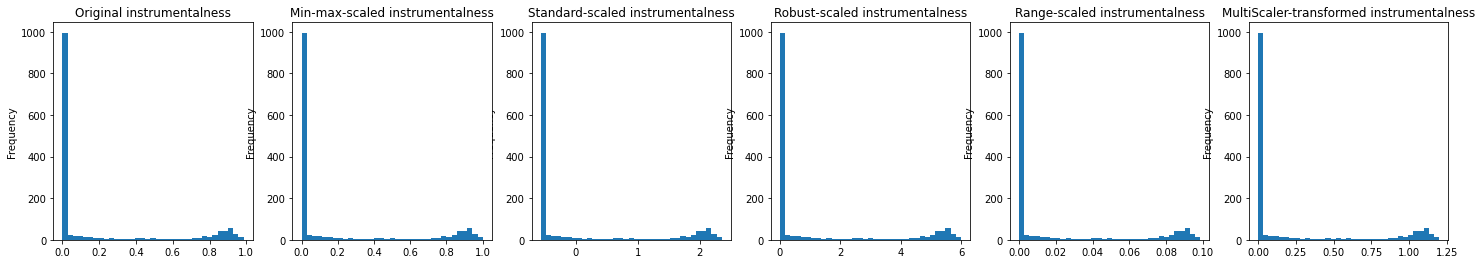

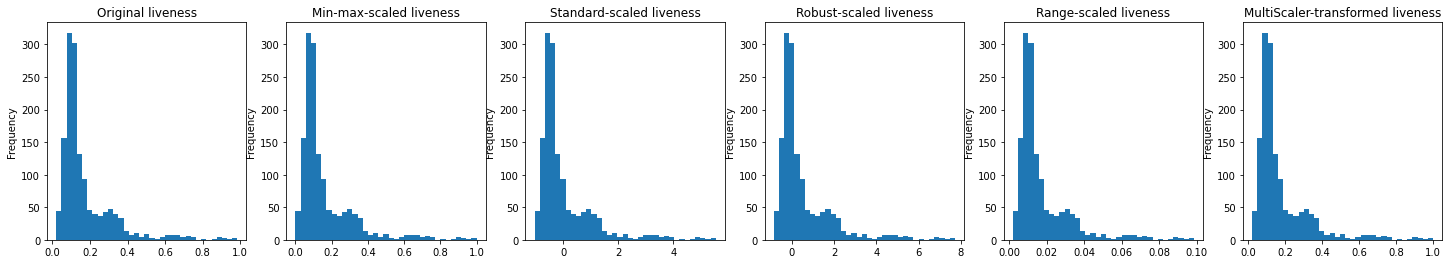

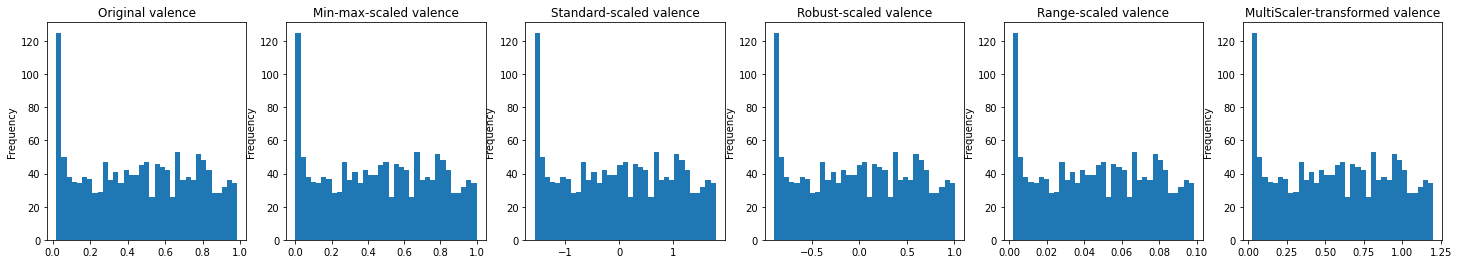

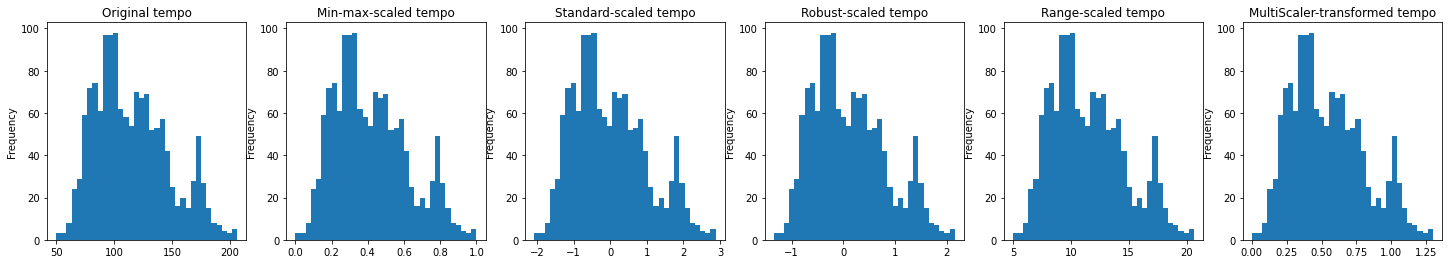

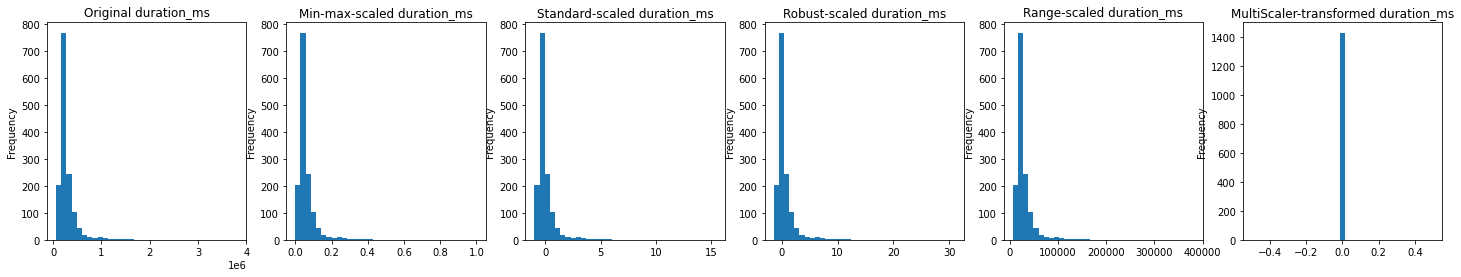

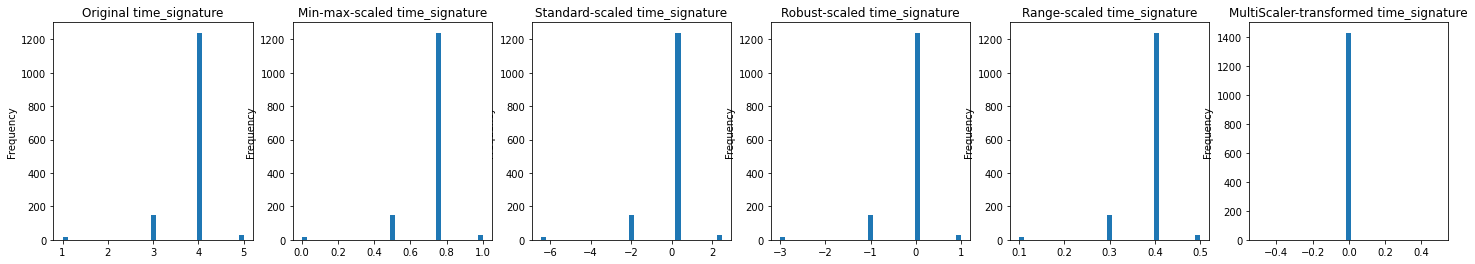

In [48]:
cols = df_au_numerics_middle.columns
for var in cols:
    plt.figure(figsize=(25, 4))
    
    
    # plot original data
    plt.subplot(1, 6, 1)
    df_au_numerics_middle[var].plot.hist(bins=35)
    plt.title(f"Original {var}")
    
    # plot standard scaled data
    plt.subplot(1, 6, 3)
    df_norm_Standard_middle[var].plot.hist(bins=35)
    plt.title(f"Standard-scaled {var}")

    # plot min-max scaled data
    plt.subplot(1, 6, 2)
    df_norm_MinMax_middle[var].plot.hist(bins=35)
    plt.title(f"Min-max-scaled {var}")

    
    # plot robust scaled data
    plt.subplot(1, 6, 4)
    df_norm_Robust_middle[var].plot.hist(bins=35)
    plt.title(f"Robust-scaled {var}")


     # plot range-scaled data
    plt.subplot(1, 6, 5)
    df_norm_Range_middle[var].plot.hist(bins=35)
    plt.title(f"Range-scaled {var}")
    
    # plot MultyScalere transformed data
    plt.subplot(1, 6, 6)
    df_MultyScaler_middle[var].plot.hist(bins=35)
    plt.title(f"MultiScaler-transformed {var}")
    
    # show all plots
    plt.show()

Finding best K for K-Mean:


In [76]:
#this function calculate the inertia_values and silhouette coefficient
#abd then finds he elbows
def find_local_max(list):
    local_maxs =[]
    for index in range(2,len(list)):
        if (list[index-1]<list[index] and list[index]>list[index+1]):
            local_maxs.append(index) 
    return local_maxs

def best_k(data, min_clusters, max_clusters,visual= True):
    inertia_values = [] #create an empty list for inertia values
    silhouette_scores = [] #create an empty list for silhouette coefficients
    number_clusters = range(min_clusters, max_clusters + 1)#create a range for number of clusters

    #calculate inertia values and silhouette coefficients for all cluster numbers and append them in their lists
    for n in number_clusters:
        k_means = KMeans(n_clusters= n)
        k_means.fit(data)
        inertia_values.append(k_means.inertia_)
        silhouette_scores.append(silhouette_score(data, k_means.labels_))
        
    #we determined some sensitivitys for use the KneeLocator()
    sensitivity = [1, 3, 5, 10, 20, 30, 50]
    
    silhouette_elbows =[] #create an empty list for silhouette elbows
    inertia_elbows = [] #create an empty list for inertia elbows
    
    #calculate elbows with all sensitivitys
    for s in sensitivity: 
        kl_s = KneeLocator(number_clusters, silhouette_scores, curve="convex", direction="decreasing", S=s)
        silhouette_elbows.append(kl_s.knee)
        kl_i = KneeLocator(number_clusters, inertia_values, curve="convex", direction="decreasing", S=s)
        inertia_elbows.append(kl_i.elbow)

    
    #visualation for both method and their elbows
    if visual:
        plt.subplots(figsize = (25,10))
        colors = ["r", "g", "k", "m", "c", "orange"]
        
        ax1 =plt.subplot(1,2,1)
        plt.plot(number_clusters, inertia_values, 'bx-')
        plt.xticks(number_clusters)
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Elbow Method For Optimal k')
        for i, c, s in zip(inertia_elbows, colors, sensitivity):
            plt.vlines(i,min(inertia_values), max(inertia_values), linestyles="--", colors=c, label=f"S = {s}")
        plt.legend()

        ax2 = plt.subplot(1,2,2)
        ax2.set_ylim(min(silhouette_scores)- 0.1, max(silhouette_scores) + 0.1)
        plt.plot(number_clusters, silhouette_scores, 'bx-')
        plt.xticks(number_clusters)
        plt.xlabel('k')
        plt.ylabel('silhouette score')
        plt.title('Silhouette Scores For Optimal k')
        
        for e, c, s in zip(silhouette_elbows, colors, sensitivity):
            plt.vlines(e, 0, 1, linestyles="--", colors=c, label=f"S = {s}")
        plt.legend()

        plt.show()
    
    return  inertia_elbows, silhouette_elbows , find_local_max(silhouette_scores)

e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


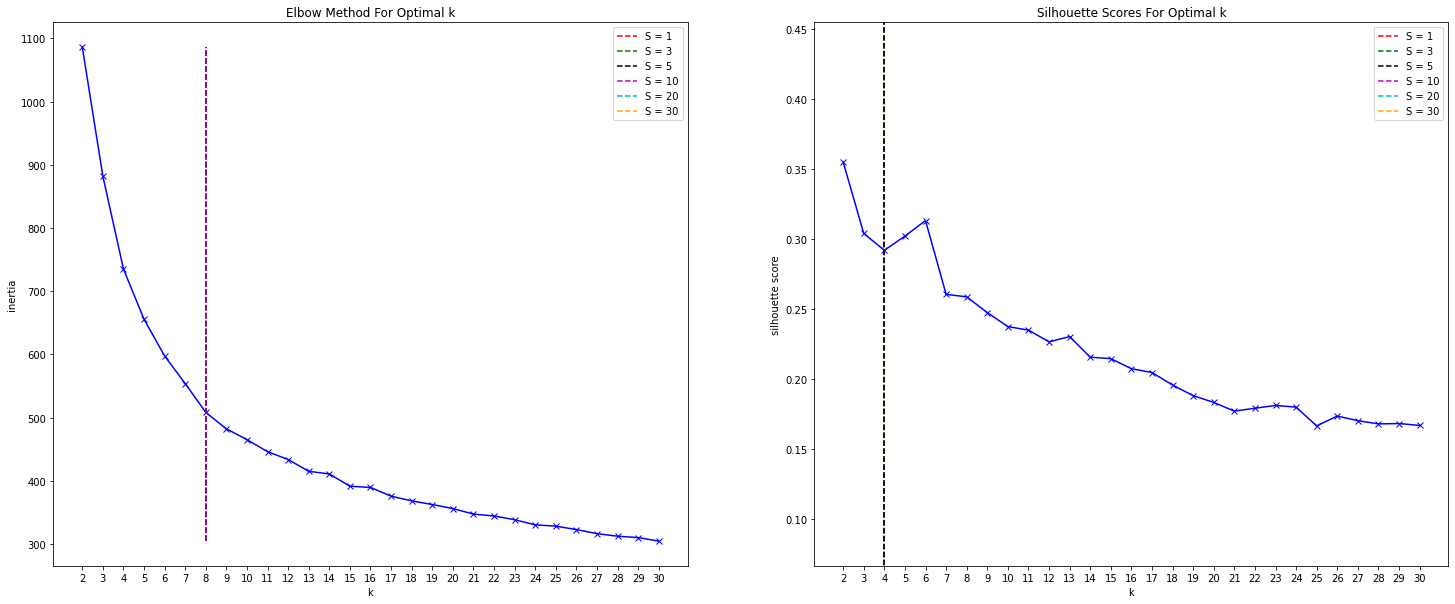

([8, 8, 8, 8, None, None, None],
 [4, 4, 4, None, None, None, None],
 [4, 11, 21, 24, 27])

In [77]:

best_k(df_MultyScaler_middle,2,30)

Original DF


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


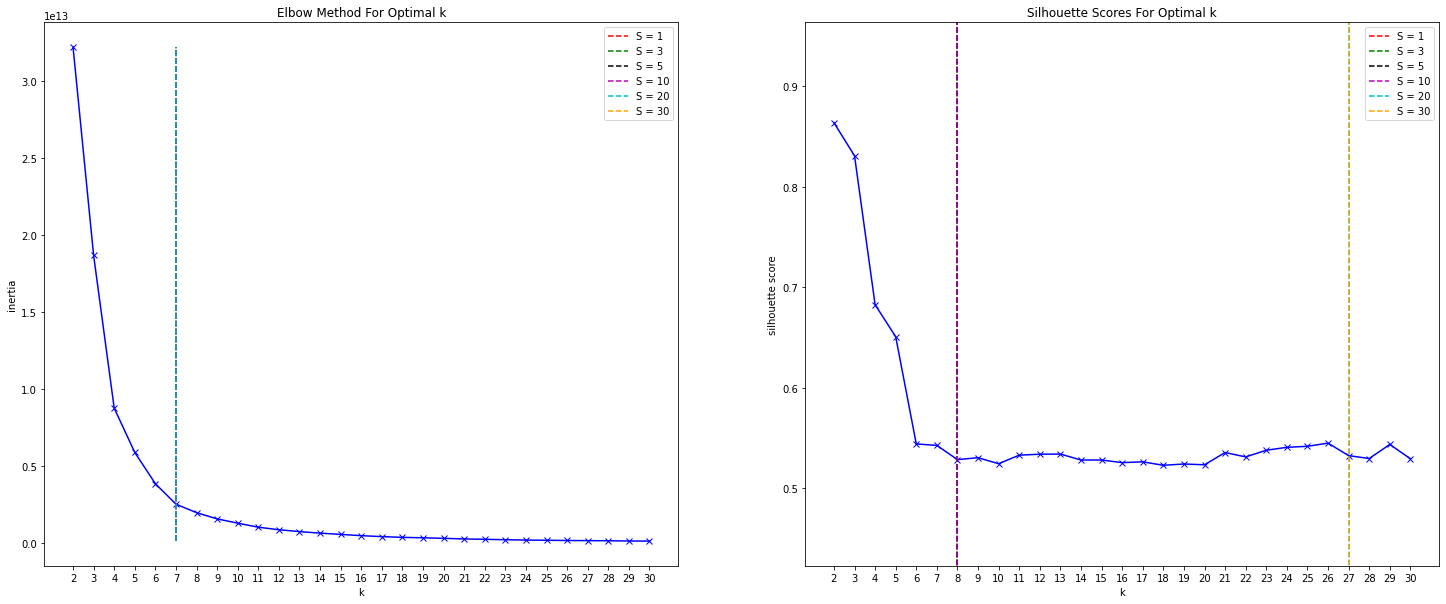

Standard scaled:


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


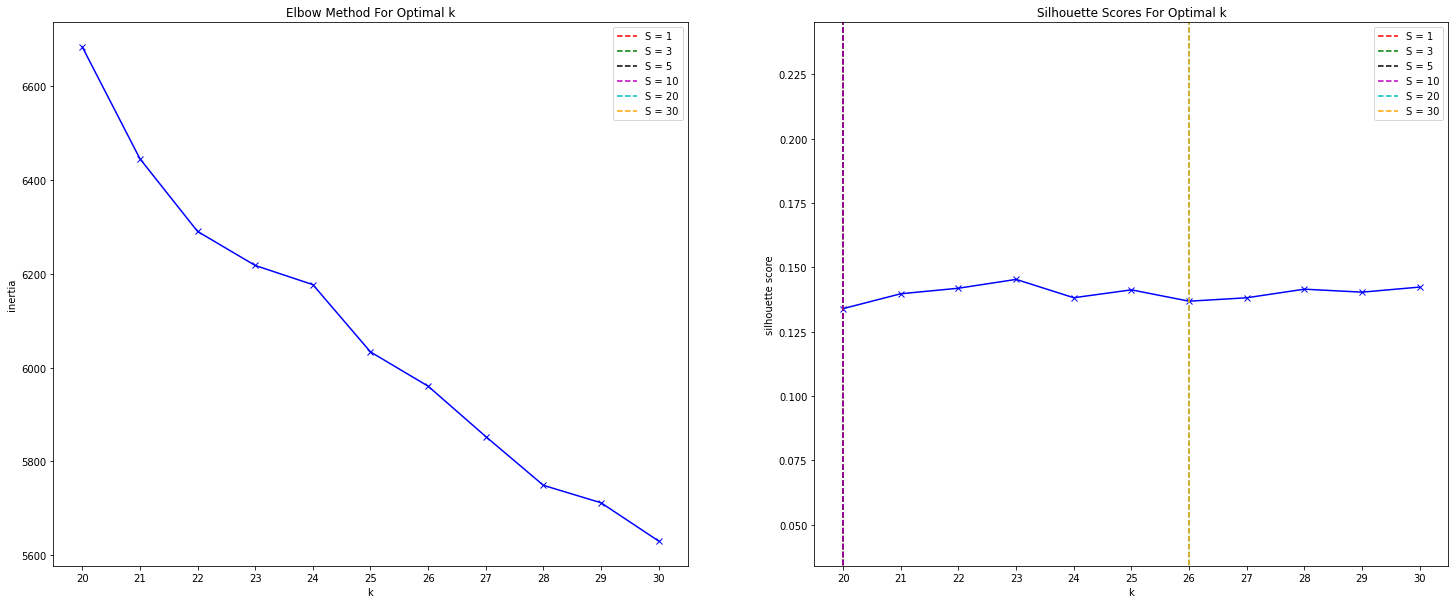

Min-max scaled:


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


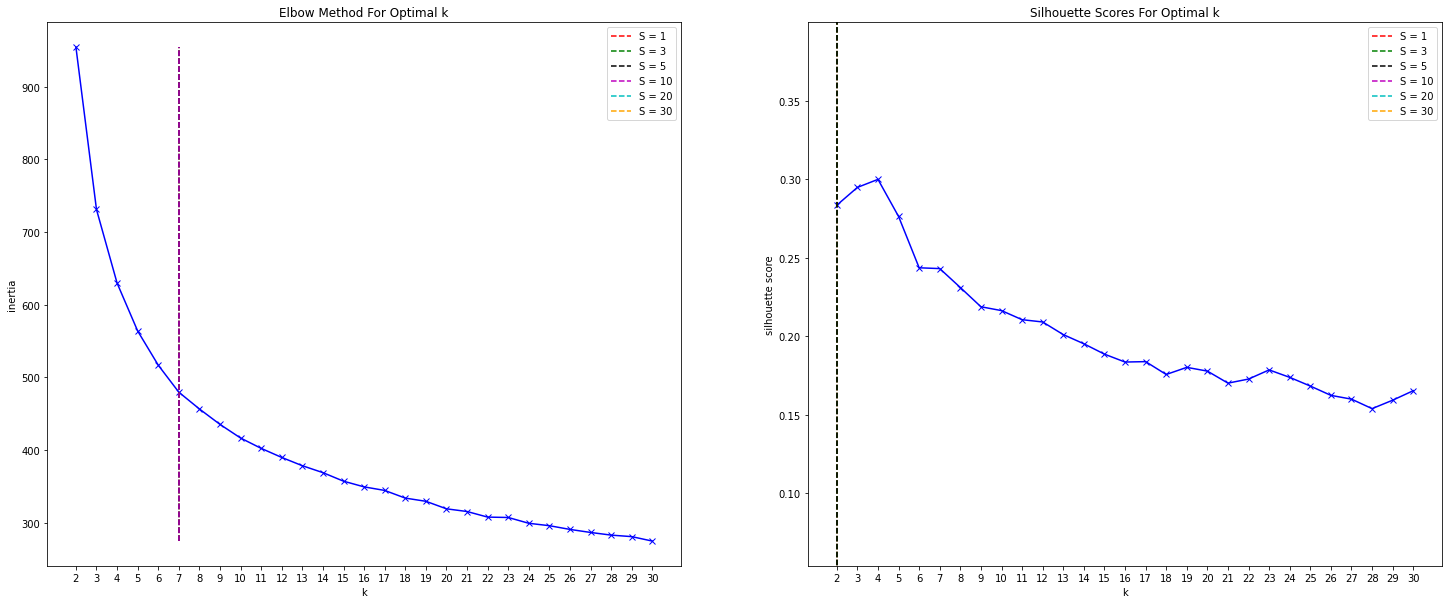

Robust scaled:


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


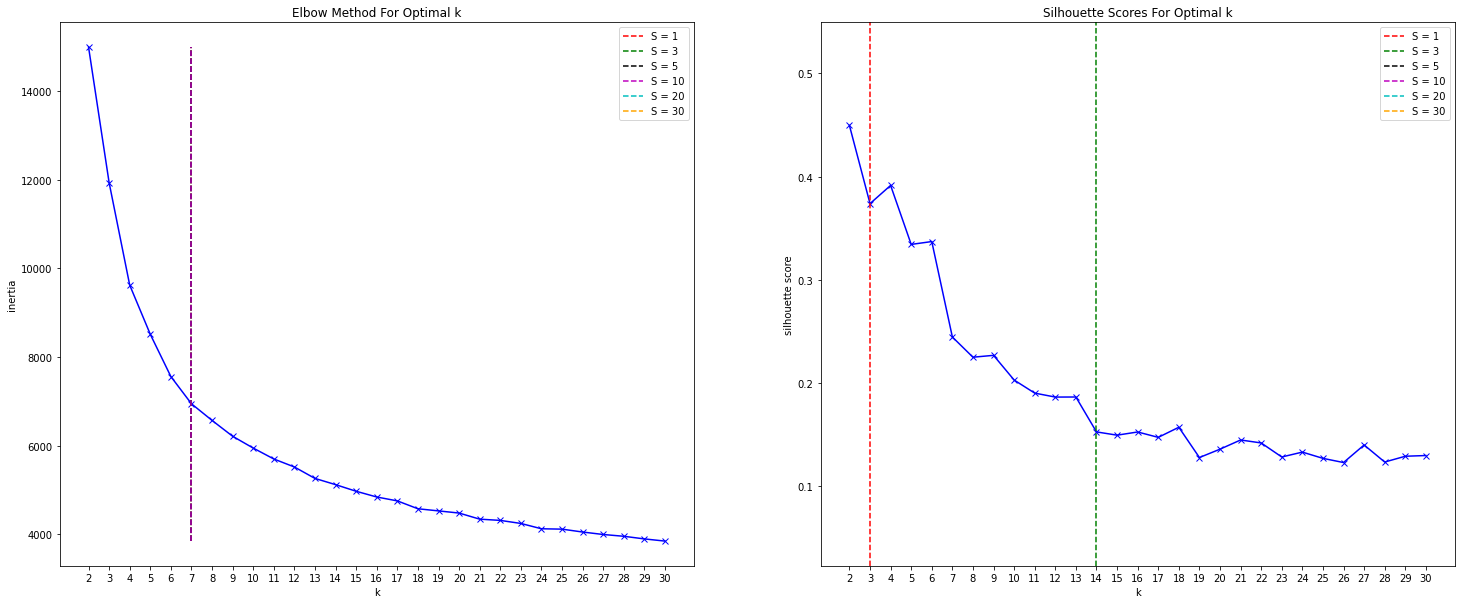

Range scaled:


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


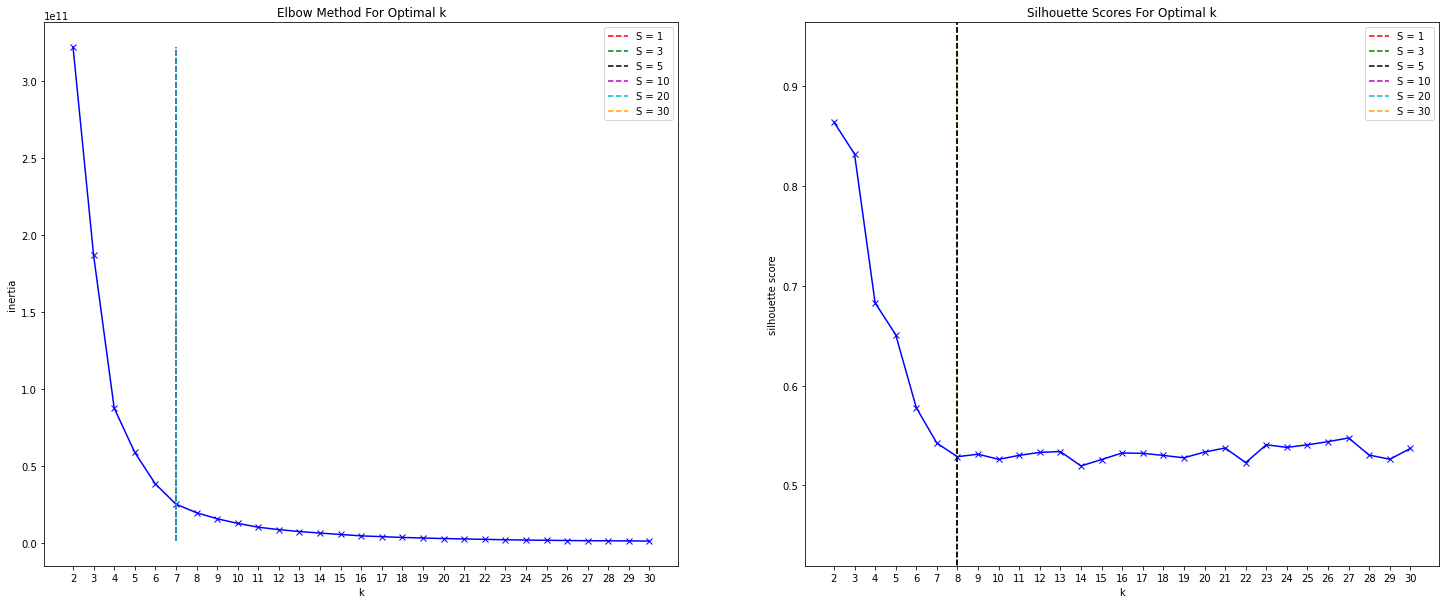

MultiScaler scaled:


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


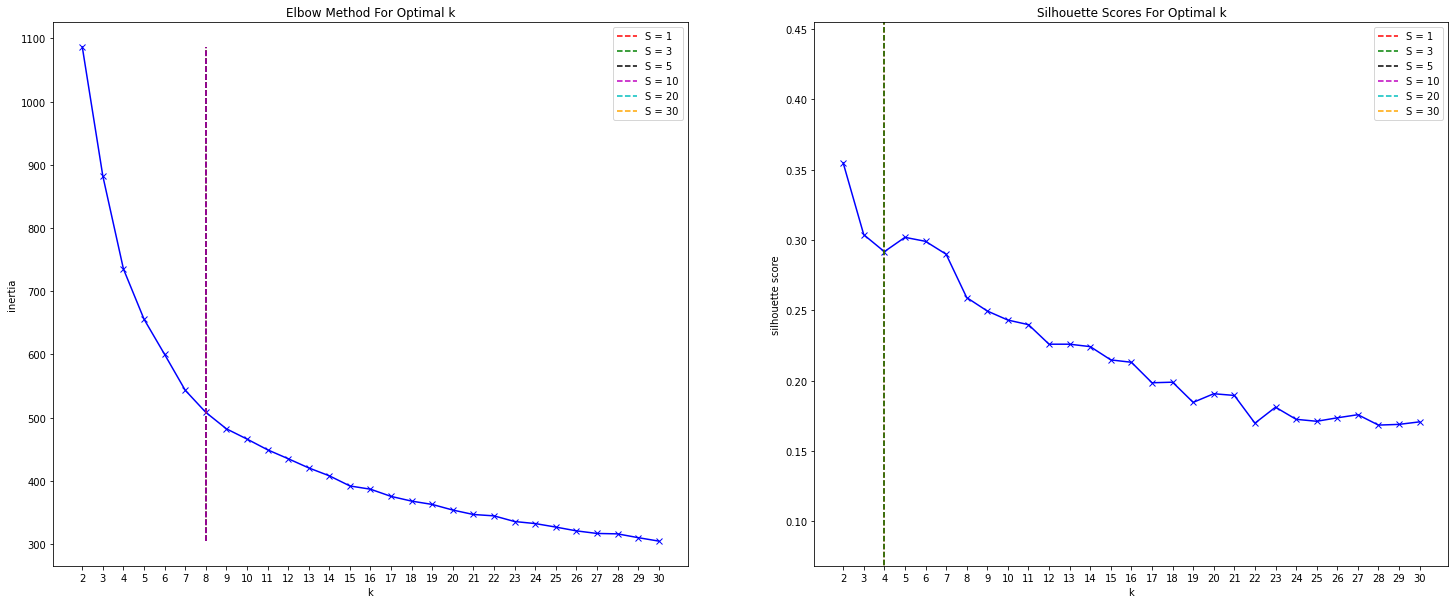

([8, 8, 8, 8, None, None, None], [4, 4, None, None, None, None, None])

In [55]:
print("Original DF")
best_k(df_au_numerics_middle,2,30)

print('Standard scaled:')
best_k(df_norm_Standard_middle,20,30)

print('Min-max scaled:')
best_k(df_norm_MinMax_middle,2,30)

print('Robust scaled:')
best_k(df_norm_Robust_middle,2,30)

print('Range scaled:')
best_k(df_norm_Range_middle,2,30)

print('MultiScaler scaled:')
best_k(df_MultyScaler_middle,2,30)

**find_best_k()**

i craeted a function that gives us a number and a Numeric range for best k automaticly. but i think its better to decide by myslef. 


In [56]:
def find_best_k(data, min_clusters, max_clusters):
    inertia_values = [] #create an empty list for inertia values
    silhouette_scores = [] #create an empty list for silhouette coefficients
    number_clusters = range(min_clusters, max_clusters + 1)#create a range for number of clusters

    #calculate inertia values and silhouette coefficients for all cluster numbers and append them in their lists
    for n in number_clusters:
        k_means = KMeans(n_clusters= n)
        k_means.fit(data)
        inertia_values.append(k_means.inertia_)
        silhouette_scores.append(silhouette_score(data, k_means.labels_))
        
    #we determined some sensitivitys for use the KneeLocator()
    sensitivity = [1, 3, 5, 10, 20, 30, 50]
      
    inertia_elbows_list =[]
    silhouette_elbows_list = []
    for i in range(5):
        silhouette_elbows =[] #create an empty list for silhouette elbows
        inertia_elbows = [] #create an empty list for inertia elbows
        
        #calculate elbows with all sensitivitys
        for s in sensitivity: 
            kl_s = KneeLocator(number_clusters, silhouette_scores, curve="convex", direction="decreasing", S=s)
            silhouette_elbows.append(kl_s.elbow)
            kl_i = KneeLocator(number_clusters, inertia_values, curve="convex", direction="decreasing", S=s)
            inertia_elbows.append(kl_i.elbow) 
        #append the elbow that we found  
        inertia_elbows_list.append(np.max([in_elbow  for in_elbow in inertia_elbows if in_elbow !=None]))
        silhouette_elbows_list.append(np.max([si_elbow  for si_elbow in silhouette_elbows if si_elbow !=None]))
    #we use the mean of the values
    inertia_elbows_mean = np.mean(inertia_elbows_list)
    silhouette_elbows_mean = np.mean(silhouette_elbows_list)
    #the KneeLocator() uses random values to calculate best elbows, and some times the resaults are not good enogh
    # then we recalulate it again 
    if inertia_elbows_mean >= silhouette_elbows_mean:
      return find_best_k(data, min_clusters, max_clusters)
    #return the mean value and the logical period of k
    return np.mean([inertia_elbows_mean,silhouette_elbows_mean]), (inertia_elbows_mean,silhouette_elbows_mean)

the codes below are temp and test codes

In [10]:
# choose columns that we dont need them in the model
drop_columns=['artist', 'type', 'id','html']
# set name as index to dataframe
df_au_numerics = df_audio_features.set_index('name')
# drop the wxtra columns
df_au_numerics.drop(columns = drop_columns, inplace= True)


In [11]:

#just for making our list of scaler i save the scalers in small names variables
max_s = preprocessing.MaxAbsScaler
min_max_s = preprocessing.MinMaxScaler
standard_s = preprocessing.StandardScaler
robust_s = preprocessing.RobustScaler

#this function get a data frame and a list of (scalers names, weight) for each column
#and it return a scaled data frame with the input list 
def multy_sk_scaler(df,fn_list):
    index=0
    scaled_df = pd.DataFrame()#create aan empty dataframe
    for col_name in df.columns: # for each columns
        #save the scaler function in scaler_fn and fit it just by the column that we want to apply 
        scaler_fn = fn_list[index][0]()
        scaler_fn.fit(df[[col_name,col_name]])
        #aplly the scaler and add the result in a column with same name 
        scaled_df[col_name]=(scaler_fn.transform(df[[col_name,col_name]])[:,0]) *fn_list[index][1] # multiply by the weight for column 
        index+=1
    return scaled_df    

In [12]:
#create a list of scale_types and weight for each column
list_functions = [(max_s,1.3), (max_s,1.3),(max_s,1),(min_max_s,1), (max_s,1), (max_s,1.2), (max_s,1.3), (max_s,1.2), (max_s,1), (max_s,1.2), (min_max_s,1), (max_s,0), (max_s,0)]
#apply the multy_scaler_fn to normilize the dataframe
multy_scaled_df = multy_sk_scaler(df_au_numerics, list_functions)

#normilize dataframe by just MinMaxScaler() 
fn_minmax = preprocessing.MinMaxScaler()
minmax_scaled = fn_minmax.fit_transform(df_au_numerics)
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=df_au_numerics.columns, index=df_au_numerics.index)

In [245]:
#this function calculate the inertia_values and silhouette coefficient
#abd then finds he elbows
def best_k(data, min_clusters, max_clusters,visual= True):
    inertia_values = [] #create an empty list for inertia values
    silhouette_scores = [] #create an empty list for silhouette coefficients
    number_clusters = range(min_clusters, max_clusters + 1)#create a range for number of clusters

    #calculate inertia values and silhouette coefficients for all cluster numbers and append them in their lists
    for n in number_clusters:
        k_means = KMeans(n_clusters= n)
        k_means.fit(data)
        inertia_values.append(k_means.inertia_)
        silhouette_scores.append(silhouette_score(data, k_means.labels_))
        
    #we determined some sensitivitys for use the KneeLocator()
    sensitivity = [1, 3, 5, 10, 20, 30, 50]
    
    silhouette_elbows =[] #create an empty list for silhouette elbows
    inertia_elbows = [] #create an empty list for inertia elbows
    
    #calculate elbows with all sensitivitys
    for s in sensitivity: 
        kl_s = KneeLocator(number_clusters, silhouette_scores, curve="convex", direction="decreasing", S=s)
        silhouette_elbows.append(kl_s.elbow)
        kl_i = KneeLocator(number_clusters, inertia_values, curve="convex", direction="decreasing", S=s)
        inertia_elbows.append(kl_i.elbow)

    
    #visualation for both method and their elbows
    if visual:
        plt.subplots(figsize = (25,10))
        colors = ["r", "g", "k", "m", "c", "orange"]
        
        ax1 =plt.subplot(1,2,1)
        plt.plot(number_clusters, inertia_values, 'bx-')
        plt.xticks(number_clusters)
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Elbow Method For Optimal k')
        for i, c, s in zip(inertia_elbows, colors, sensitivity):
            plt.vlines(i,0, 4000, linestyles="--", colors=c, label=f"S = {s}")
        plt.legend()

        ax2 = plt.subplot(1,2,2)
        ax2.set_ylim(min(silhouette_scores)- 0.1, max(silhouette_scores) + 0.1)
        plt.plot(number_clusters, silhouette_scores, 'bx-')
        plt.xticks(number_clusters)
        plt.xlabel('k')
        plt.ylabel('silhouette score')
        plt.title('Silhouette Scores For Optimal k')
        
        for e, c, s in zip(silhouette_elbows, colors, sensitivity):
            plt.vlines(e, 0, 1, linestyles="--", colors=c, label=f"S = {s}")
        plt.legend()

        plt.show()
    
    return  inertia_elbows, silhouette_elbows


e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


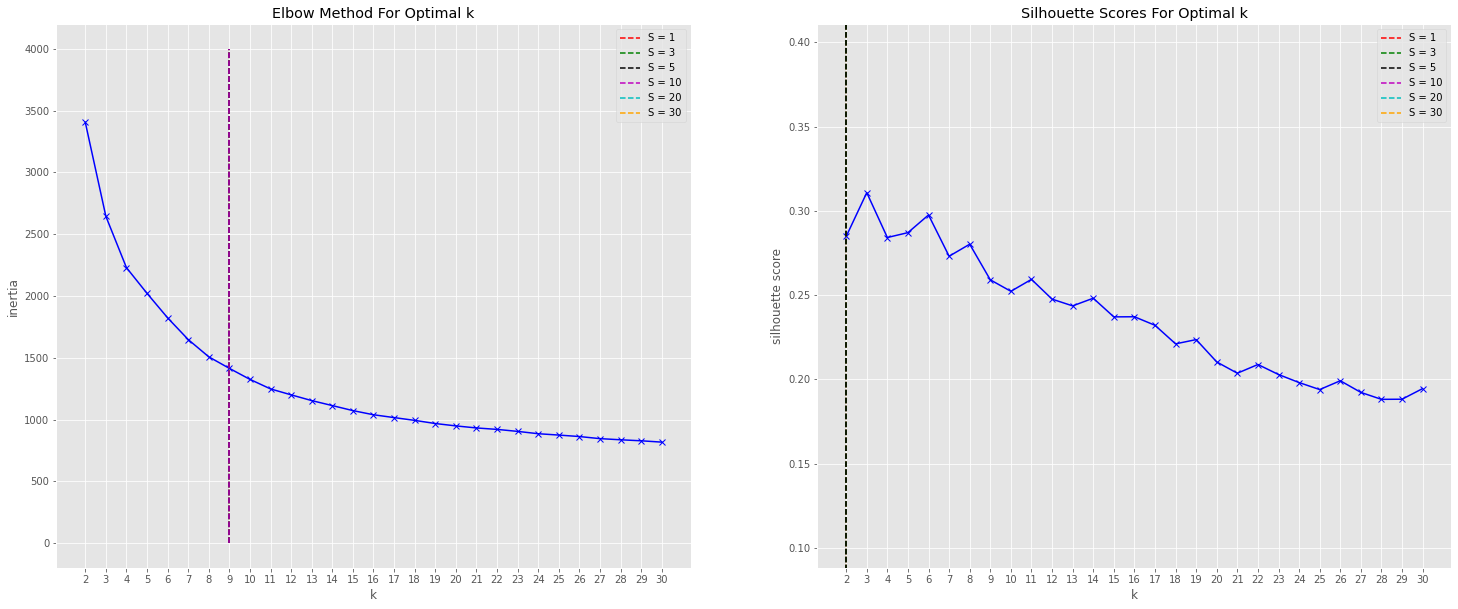

([9, 9, 9, 9, None, None, None], [2, 2, 2, None, None, None, None])

In [246]:
best_k(minmax_scaled_df,2,30)

e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1146: RuntimeWarning: All-NaN axis encountered
  minx = np.nanmin(masked_verts[..., 0])
e:\Program Files\Python310\lib\site-packages\matplotlib\axes\_axes.py:1147: RuntimeWarning: All-NaN axis encountered
  maxx = np.nanmax(masked_verts[..., 0])


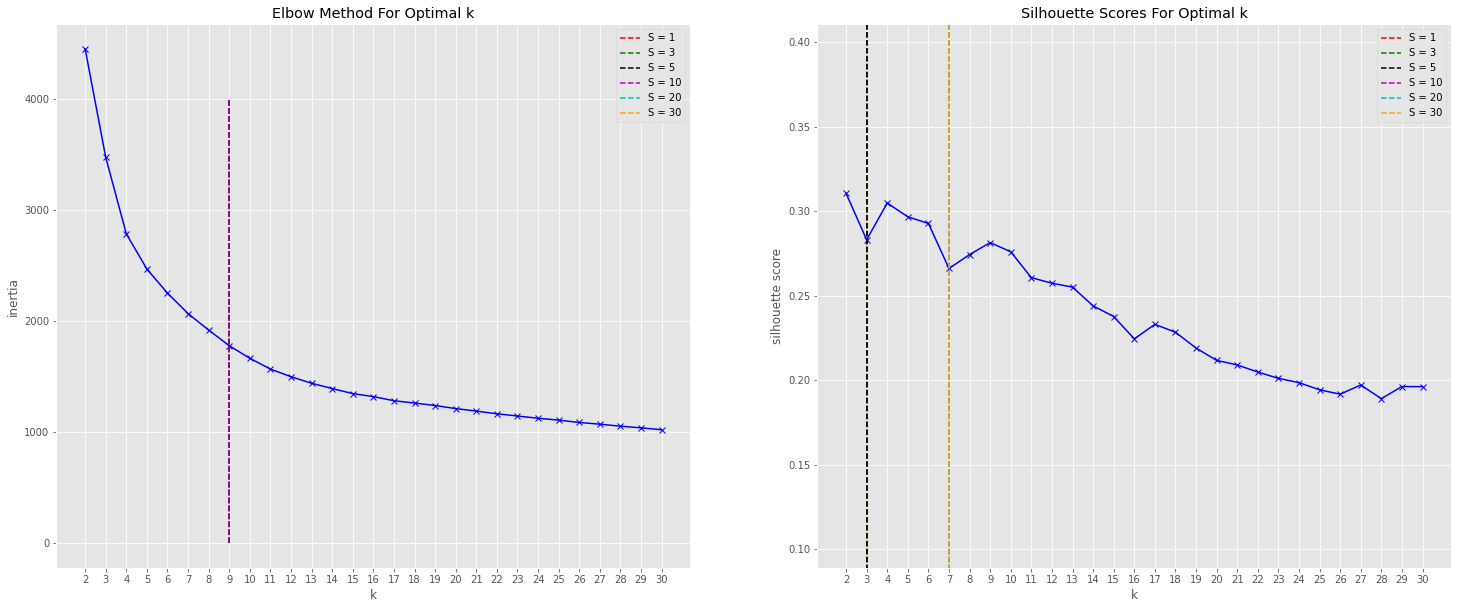

([9, 9, 9, 9, None, None, None], [3, 3, 3, 7, 7, 7, 7])

In [247]:
best_k(multy_scaled_df,2,30)

In [16]:
def find_best_k(data, min_clusters, max_clusters):
    inertia_values = [] #create an empty list for inertia values
    silhouette_scores = [] #create an empty list for silhouette coefficients
    number_clusters = range(min_clusters, max_clusters + 1)#create a range for number of clusters

    #calculate inertia values and silhouette coefficients for all cluster numbers and append them in their lists
    for n in number_clusters:
        k_means = KMeans(n_clusters= n)
        k_means.fit(data)
        inertia_values.append(k_means.inertia_)
        silhouette_scores.append(silhouette_score(data, k_means.labels_))
        
    #we determined some sensitivitys for use the KneeLocator()
    sensitivity = [1, 3, 5, 10, 20, 30, 50]
      
    inertia_elbows_list =[]
    silhouette_elbows_list = []
    for i in range(5):
        silhouette_elbows =[] #create an empty list for silhouette elbows
        inertia_elbows = [] #create an empty list for inertia elbows
        
        #calculate elbows with all sensitivitys
        for s in sensitivity: 
            kl_s = KneeLocator(number_clusters, silhouette_scores, curve="convex", direction="decreasing", S=s)
            silhouette_elbows.append(kl_s.elbow)
            kl_i = KneeLocator(number_clusters, inertia_values, curve="convex", direction="decreasing", S=s)
            inertia_elbows.append(kl_i.elbow) 
        #append the elbow that we found  
        inertia_elbows_list.append(np.max([in_elbow  for in_elbow in inertia_elbows if in_elbow !=None]))
        silhouette_elbows_list.append(np.max([si_elbow  for si_elbow in silhouette_elbows if si_elbow !=None]))
    #we use the mean of the values
    inertia_elbows_mean = np.mean(inertia_elbows_list)
    silhouette_elbows_mean = np.mean(silhouette_elbows_list)
    #the KneeLocator() uses random values to calculate best elbows, and some times the resaults are not good enogh
    # then we recalulate it again 
    if inertia_elbows_mean >= silhouette_elbows_mean:
      return find_best_k(data, min_clusters, max_clusters)
    #return the mean value and the logical period of k
    return np.mean([inertia_elbows_mean,silhouette_elbows_mean]), (inertia_elbows_mean,silhouette_elbows_mean)

In [14]:
find_best_k(multy_scaled_df,2,30)

e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")
e:\Program Files\Python310\lib\site-packages\kneed\knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow 

(19.0, (10.0, 28.0))

In [ ]:
#finding the best k by our find_best_k
# best_k , kk = find_best_k(multy_scaled_df,2,30)
# best_k = int(best_k)+1
# initialize the model
my_kmeans = KMeans(n_clusters= 19)
# fit the model to the data
my_kmeans.fit(multy_scaled_df) # pass your scaled data here
# obtain the cluster output
clusters = my_kmeans.predict(multy_scaled_df) # pass your scaled data here
# attach the cluster output to our original DataFrame
df_audio_features["cluster"] = clusters
df_audio_features.drop(columns=['html', 'id'])

In [231]:
df_audio_features.groupby('cluster').count()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster2
cluster,,,,,,,,,,,,,,,,,,,
0,91,91,91,91,91,91,91,91,91,91,91,91,91,0,91,91,91,91,91
1,83,83,83,83,83,83,83,83,83,83,83,83,83,0,83,83,83,83,83
2,67,67,67,67,67,67,67,67,67,67,67,67,67,0,67,67,67,67,67
3,81,81,81,81,81,81,81,81,81,81,81,81,81,0,81,81,81,81,81
4,104,104,104,104,104,104,104,104,104,104,104,104,104,0,104,104,104,104,104
5,99,99,99,99,99,99,99,99,99,99,99,99,99,0,99,99,99,99,99
6,46,46,46,46,46,46,46,46,46,46,46,46,46,0,46,46,46,46,46
7,72,72,72,72,72,72,72,72,72,72,72,72,72,0,72,72,72,72,72
8,162,162,162,162,162,162,162,162,162,162,162,162,162,0,162,162,162,162,162


In [ ]:
plt.subplots(figsize = (25,10))

plt.subplot(1,2,1)
plt.plot(range(2,30), inertia_list, 'bx-')
plt.xticks(range(2,30))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')

plt.subplot(1,2,2)
plt.plot(range(2,30), silhouette_list, 'bx-')
plt.xticks(range(2,30))
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Scores For Optimal k')

plt.show()